In [50]:
import sys
sys.path.append('/Users/gomez/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time
from scipy.stats import linregress

from config import weather_api_key

In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 2 of Set 1 | manono
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | maryville
Processing Record 6 of Set 1 | yaan
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | angoche
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | ko samui
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | newport
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | bethel
Pr

Processing Record 37 of Set 4 | alofi
Processing Record 38 of Set 4 | vila velha
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | paamiut
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | usinsk
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | jales
Processing Record 48 of Set 4 | nalut
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | horsham
Processing Record 1 of Set 5 | dunedin
Processing Record 2 of Set 5 | san luis
Processing Record 3 of Set 5 | yerbogachen
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | ramnagar
Processing Record 9 of Set 5 | acapulco
Processing Record 10 of Set 5 | kutum
Processing Record 11 of Set 5 | nguku

City not found. Skipping...
Processing Record 27 of Set 8 | luganville
Processing Record 28 of Set 8 | ust-kuyga
Processing Record 29 of Set 8 | bengkulu
Processing Record 30 of Set 8 | eyl
Processing Record 31 of Set 8 | rochefort
Processing Record 32 of Set 8 | sabratah
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | thabazimbi
Processing Record 36 of Set 8 | satitoa
City not found. Skipping...
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | kitimat
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | hithadhoo
Processing Record 41 of Set 8 | rodez
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | buchanan
Processing Record 44 of Set 8 | kourou
Processing Record 45 of Set 8 | sindor
Processing Record 46 of Set 8 | buluang
Processing Record 47 of Set 8 | kajaani
Processing Record 48 of Set 8 | olga
Processing Record 49 of Set 8 | katobu
Processing Record 5

Processing Record 11 of Set 12 | toppenish
Processing Record 12 of Set 12 | jieshou
Processing Record 13 of Set 12 | mahanoro
Processing Record 14 of Set 12 | pimenta bueno
Processing Record 15 of Set 12 | gizo
Processing Record 16 of Set 12 | maniitsoq
Processing Record 17 of Set 12 | inhambane
Processing Record 18 of Set 12 | san felipe
Processing Record 19 of Set 12 | hobyo
Processing Record 20 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 21 of Set 12 | padang
Processing Record 22 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 23 of Set 12 | pioner
Processing Record 24 of Set 12 | varnamo
Processing Record 25 of Set 12 | katangli
Processing Record 26 of Set 12 | bungu
Processing Record 27 of Set 12 | bundaberg
Processing Record 28 of Set 12 | maltahohe
Processing Record 29 of Set 12 | aktash
Processing Record 30 of Set 12 | kupang
Processing Record 31 of Set 12 | pangkalanbuun
Processing Record 32 of Set 12 | hirara
Processing Record 33 of

In [34]:
print(len(city_data))

549


In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manono,-7.30,27.42,69.96,41,34,4.12,CD,2020-06-23 00:56:39
1,Mar Del Plata,-38.00,-57.56,51.01,93,100,9.37,AR,2020-06-23 00:56:40
2,Ushuaia,-54.80,-68.30,33.80,86,20,3.36,AR,2020-06-23 00:56:40
3,Maryville,35.76,-83.97,79.00,65,75,8.05,US,2020-06-23 00:56:40
4,Yaan,7.38,8.57,71.40,98,100,3.44,NG,2020-06-23 00:56:42
5,Rikitea,-23.12,-134.97,69.51,58,54,16.06,PF,2020-06-23 00:51:46
6,Pacific Grove,36.62,-121.92,69.01,72,1,13.87,US,2020-06-23 00:52:10
7,Nanortalik,60.14,-45.24,43.39,77,0,9.64,GL,2020-06-23 00:56:42
8,East London,-33.02,27.91,63.09,35,0,5.68,ZA,2020-06-23 00:56:43
9,Angoche,-16.23,39.91,72.36,87,70,10.56,MZ,2020-06-23 00:56:43


In [36]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [37]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Manono,CD,2020-06-23 00:56:39,-7.30,27.42,69.96,41,34,4.12
1,Mar Del Plata,AR,2020-06-23 00:56:40,-38.00,-57.56,51.01,93,100,9.37
2,Ushuaia,AR,2020-06-23 00:56:40,-54.80,-68.30,33.80,86,20,3.36
3,Maryville,US,2020-06-23 00:56:40,35.76,-83.97,79.00,65,75,8.05
4,Yaan,NG,2020-06-23 00:56:42,7.38,8.57,71.40,98,100,3.44


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
today = time.strftime("%x")
today

'06/22/20'

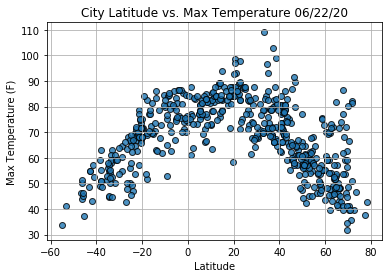

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

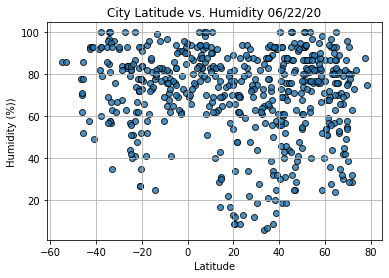

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

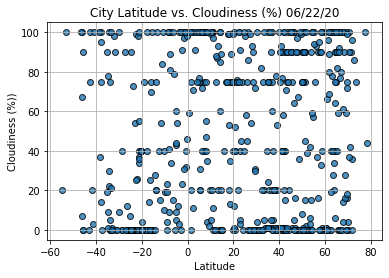

In [43]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

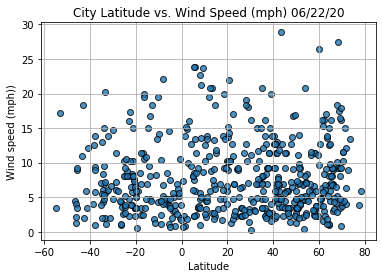

In [44]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [52]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Maryville,US,2020-06-23 00:56:40,35.76,-83.97,79.00,65,75,8.05
4,Yaan,NG,2020-06-23 00:56:42,7.38,8.57,71.40,98,100,3.44
6,Pacific Grove,US,2020-06-23 00:52:10,36.62,-121.92,69.01,72,1,13.87
7,Nanortalik,GL,2020-06-23 00:56:42,60.14,-45.24,43.39,77,0,9.64
11,Longyearbyen,SJ,2020-06-23 00:56:06,78.22,15.64,42.80,75,44,5.82


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

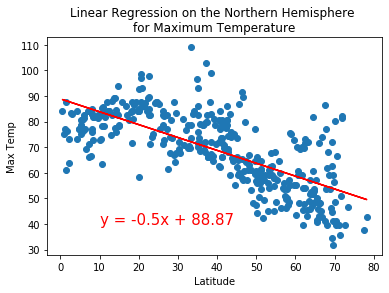

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

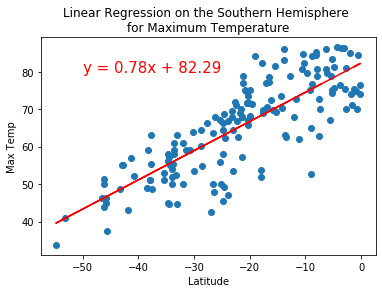

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(-50,80))

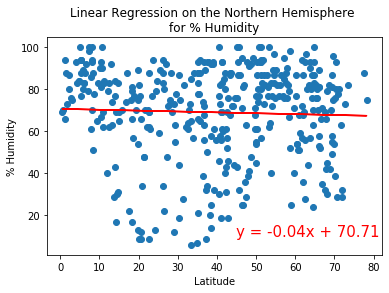

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',(45,10))

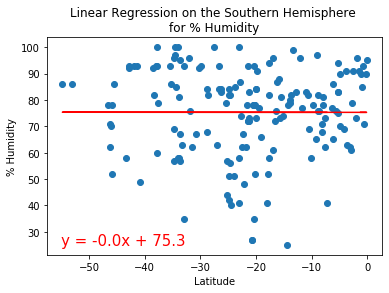

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity',(-55,25))

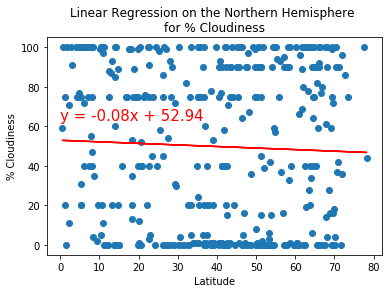

In [74]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(0,63))

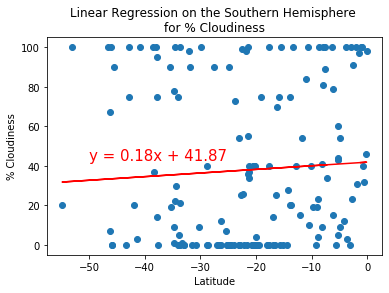

In [79]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(-50,43))

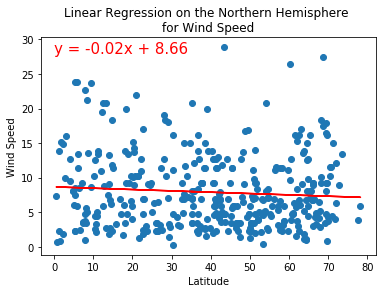

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                       'Wind Speed',(00,28))

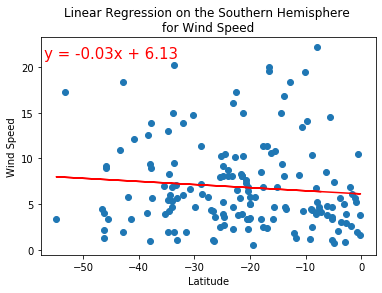

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed',
                       'Wind Speed',(-57,21))